In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier


# Load data from CSV file
file_path = r'C:\Users\Andre\Downloads\DOUTORADO\consolidadoNEWk1.xlsx'
data = pd.read_excel(file_path)
#data = pd.read_excel('c:\andre\consolidado.xlsx', sheet_name='Sheet1')

# Assuming the last column is the target/output column
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target/Output column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Load data from CSV file
file_path = r'C:\Users\Andre\Downloads\DOUTORADO\consolidadof1.xlsx'
data = pd.read_excel(file_path)

# Assuming the last column is the target/output column
X2 = data.iloc[:, :-1]  # Features (all columns except the last one)
y2 = data.iloc[:, -1]   # Target/Output column

# Split data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Melhores parâmetros: {grid_search.best_params_}")
best_model = grid_search.best_estimator_


Melhores parâmetros: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7}


Accuracy: 0.9674

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       123
           2       0.96      0.95      0.96       174
           5       0.96      0.97      0.97       285

    accuracy                           0.97       582
   macro avg       0.97      0.97      0.97       582
weighted avg       0.97      0.97      0.97       582



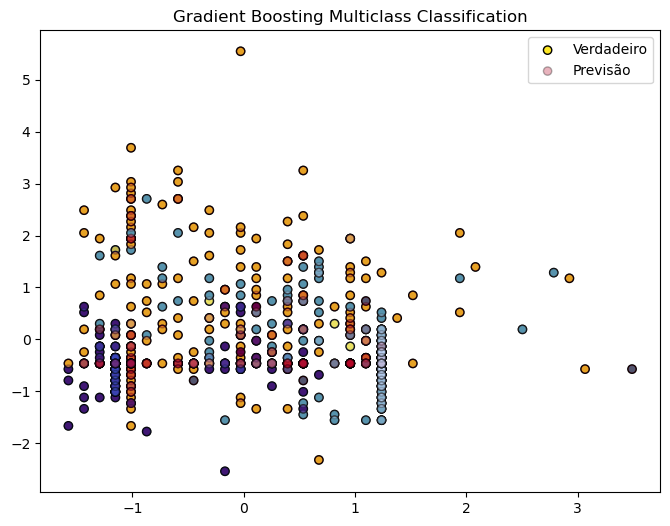

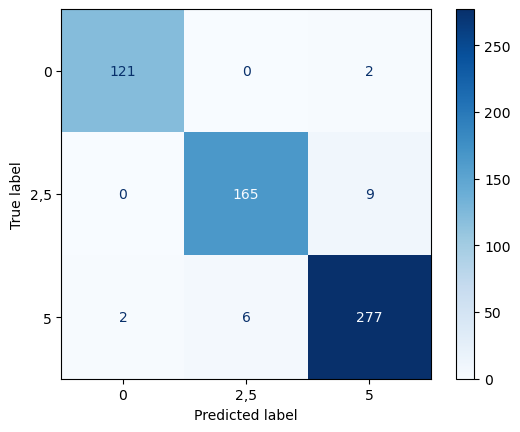

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    silhouette_score, calinski_harabasz_score
)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification


# Criando o modelo Gradient Boosting para classificação multiclasse
model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=4, subsample= 0.7, random_state=42)
#{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7}
# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Relatório de classificação
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualizando a separação das classes
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="viridis", edgecolors="k", label="Verdadeiro")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap="coolwarm", alpha=0.3, edgecolors="k", label="Previsão")
plt.legend(["Verdadeiro", "Previsão"])
plt.title("Gradient Boosting Multiclass Classification")
plt.show()

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "2,5", "5"])
disp.plot(cmap='Blues')
plt.show()


c:\conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix:
[[451  39  11]
 [ 50 405  22]
 [  3  30 455]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       501
           2       0.85      0.85      0.85       477
           5       0.93      0.93      0.93       488

    accuracy                           0.89      1466
   macro avg       0.89      0.89      0.89      1466
weighted avg       0.89      0.89      0.89      1466



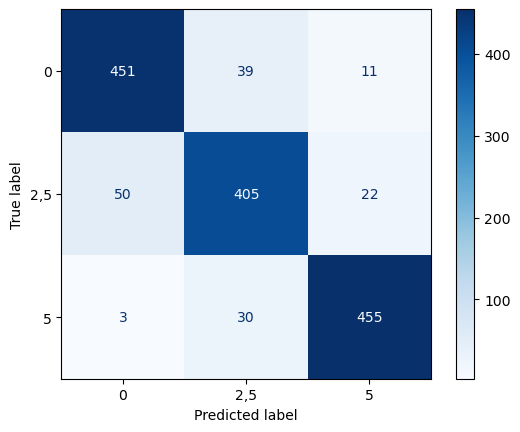

In [11]:
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    silhouette_score, calinski_harabasz_score
)

# Define the MLPClassifier
#mlp_classifier = MLPClassifier(hidden_layer_sizes=(12), max_iter=100, activation='relu', solver='adam', random_state=42)
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(20,20),
    max_iter=500,
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate='constant',
    random_state=42)
    
# Train the model
mlp_classifier.fit(X_train, y_train)

# Predict the labels for test set
y_pred = mlp_classifier.predict(X_test)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "2,5", "5"])
disp.plot(cmap='Blues')
plt.show()

In [12]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Fazendo previsões
y_pred = knn.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

# Relatório detalhado
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.85
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       501
           2       0.80      0.79      0.80       477
           5       0.89      0.94      0.91       488

    accuracy                           0.85      1466
   macro avg       0.85      0.85      0.85      1466
weighted avg       0.85      0.85      0.85      1466

